<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Word2Vec%3F_A_Simple_Explanation%7C_Gensim_%7C_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

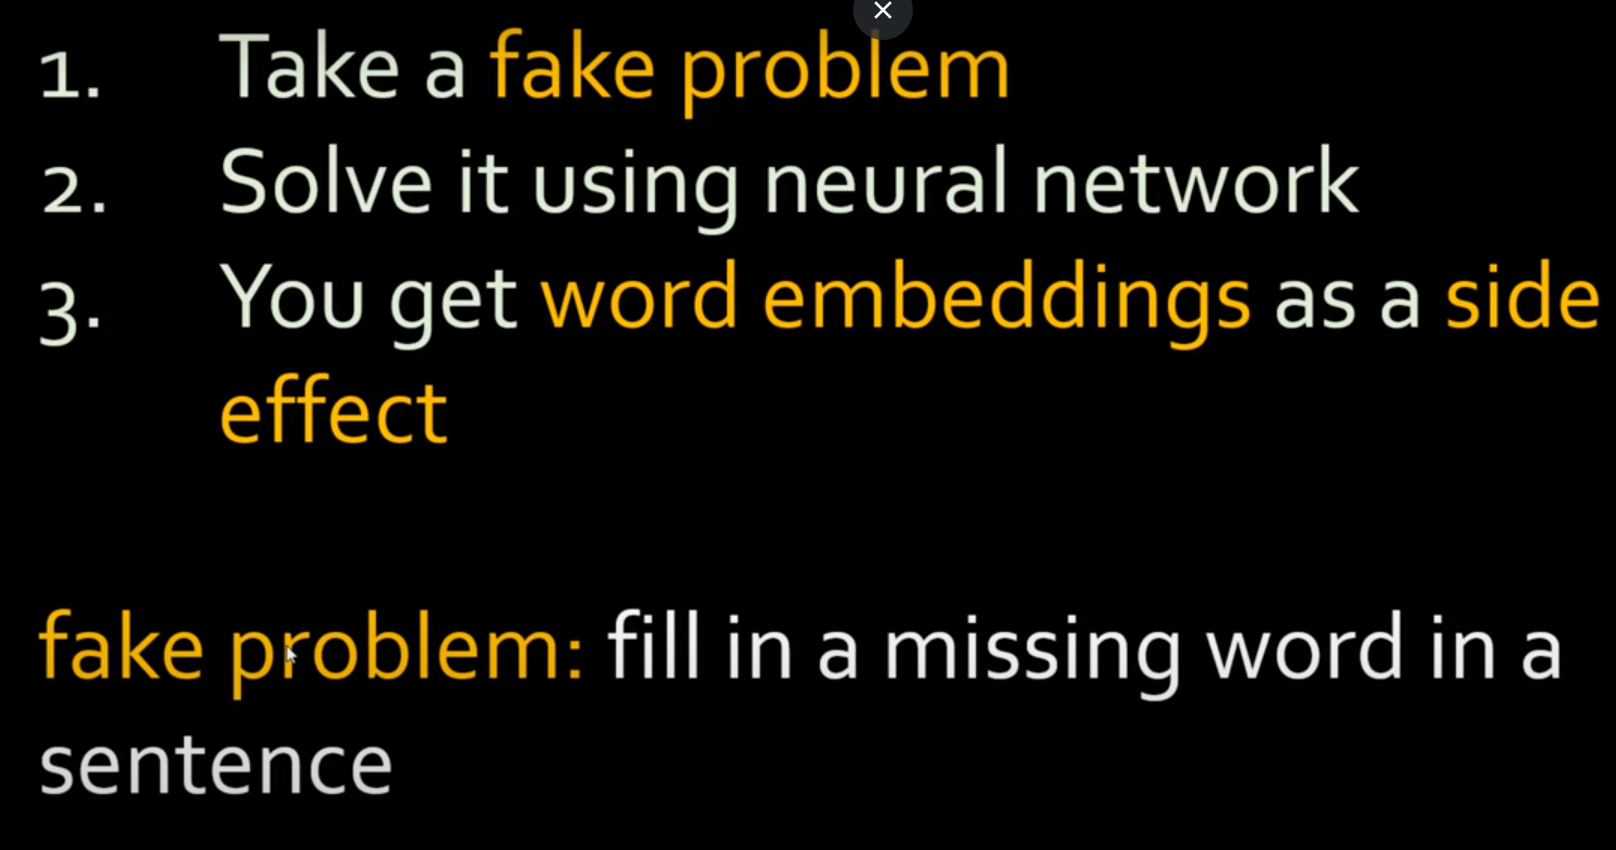

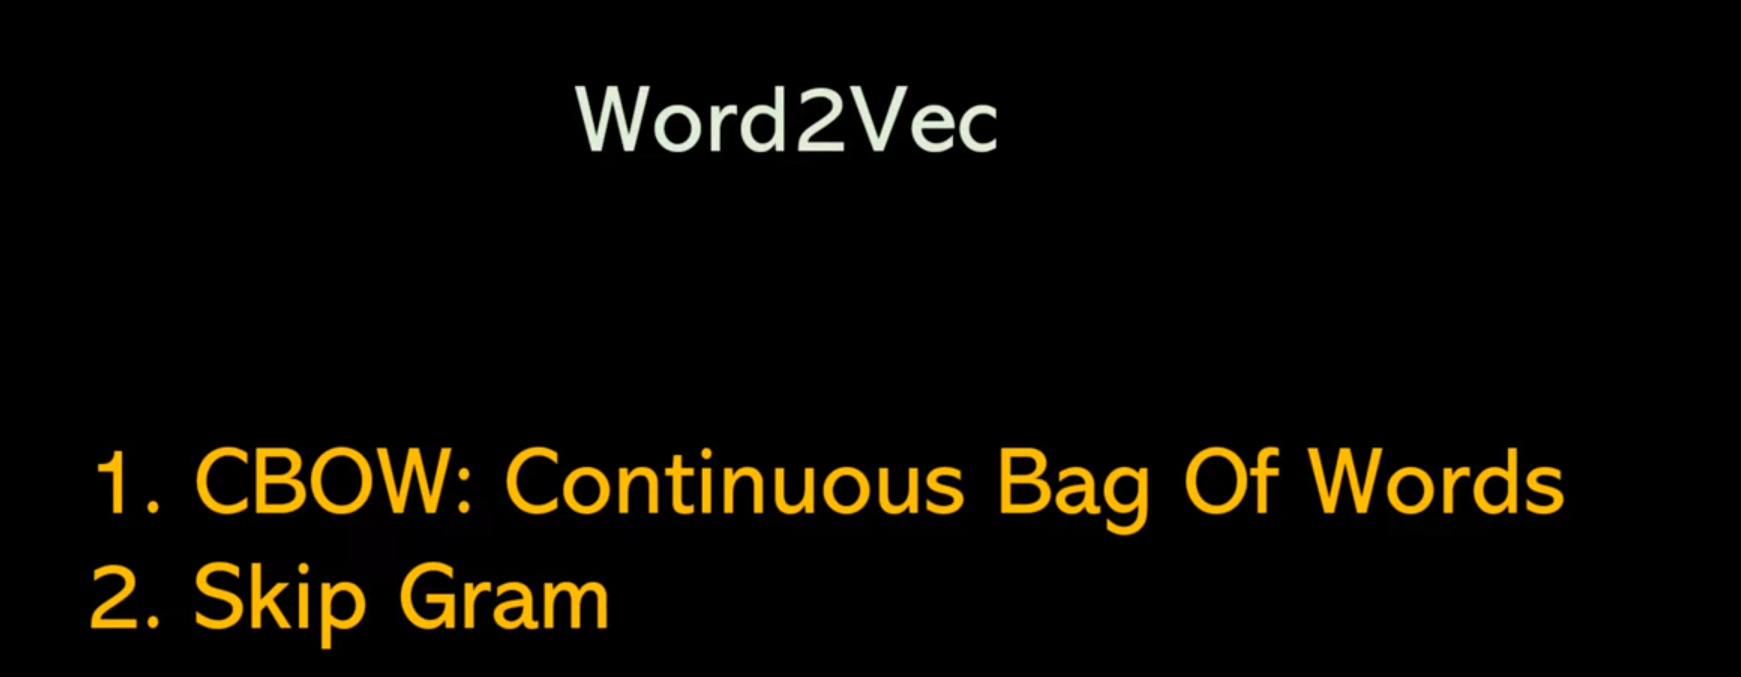

In [3]:
!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 3.7 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149851 sha256=8447935c9a8e04cd0c402c946de75e9844df8bf4b47ae109afab050f8b45022b
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [7]:
import gensim
import pandas as pd
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL
import tensorflow_datasets as tfds

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/22_word_embedding/'

Cell_Phones_and_Accessories_5.json  supervised_word_embeddings.ipynb


In [12]:
df = pd.read_json("/content/drive/MyDrive/py-master/DeepLearningML/22_word_embedding/Cell_Phones_and_Accessories_5.json", lines=True) 
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [13]:
df.shape

(194439, 9)

In [14]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [15]:
gensim.utils.simple_preprocess("They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again")

['they',
 'look',
 'good',
 'and',
 'stick',
 'good',
 'just',
 'don',
 'like',
 'the',
 'rounded',
 'shape',
 'because',
 'was',
 'always',
 'bumping',
 'it',
 'and',
 'siri',
 'kept',
 'popping',
 'up',
 'and',
 'it',
 'was',
 'irritating',
 'just',
 'won',
 'buy',
 'product',
 'like',
 'this',
 'again']

In [17]:
reviewText= df.reviewText.apply(gensim.utils.simple_preprocess)

In [18]:
reviewText.head() # List has tokenized words, this function removes punctuation, upper case to lower case and does lemetization

0    [they, look, good, and, stick, good, just, don...
1    [these, stickers, work, like, the, review, say...
2    [these, are, awesome, and, make, my, phone, lo...
3    [item, arrived, in, great, time, and, was, in,...
4    [awesome, stays, on, and, looks, great, can, b...
Name: reviewText, dtype: object

In [32]:
model= gensim.models.Word2Vec(
    window=10, # it means it will have rolling window of 10 words
    min_count= 2, # dont use sentences that has less than 2 words
    workers = 4, # use 4 cores of the CPU threads
)

In [33]:
model.build_vocab(reviewText,progress_per=1000)

In [34]:
model.epochs

5

In [35]:
model.train(reviewText,total_examples=model.corpus_count, epochs= model.epochs)

(61503533, 83868975)

In [36]:
model.save('/content/drive/MyDrive/py-master/DeepLearningML/22_word_embedding/word2vec.model')

In [37]:
model.wv.most_similar("bad")

[('terrible', 0.681498646736145),
 ('shabby', 0.6250317096710205),
 ('horrible', 0.5904844999313354),
 ('good', 0.5885494947433472),
 ('keen', 0.5499917268753052),
 ('crappy', 0.5448105931282043),
 ('okay', 0.5349680185317993),
 ('legit', 0.5321642756462097),
 ('awful', 0.5238357782363892),
 ('poor', 0.5102050304412842)]

In [38]:
model.wv.similarity(w1='good', w2='great')

0.77713126

Exercise

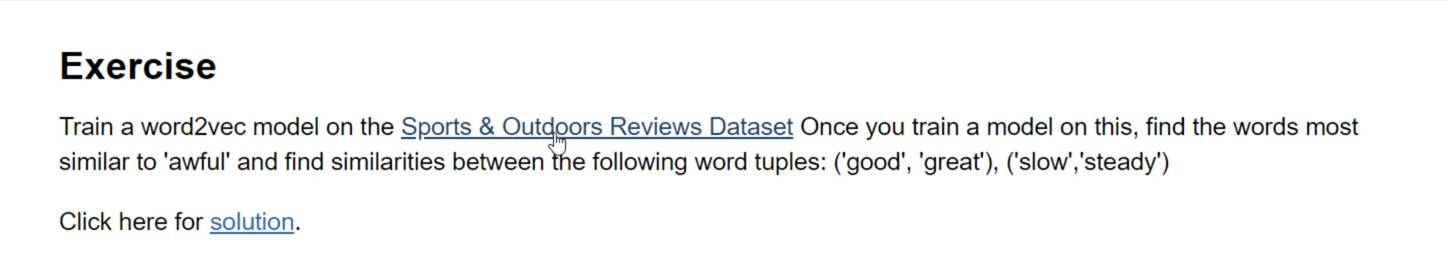